In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic' # 한글 폰트 설정
plt.rc('font', size=8)
plt.rcParams['figure.figsize'] = (15, 10) # 그래프 크기 설정

In [2]:
df=pd.read_csv('./팔린데이터최종본_cp.csv',encoding='cp949')

In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
df['판매일']=pd.to_datetime(df['판매일'])

In [5]:
df

,판매일,기간,차량/세부모델,미션,연식,연료,주행거리,색상,가격,차종
0,2021-05-01,152,[현대]그랜저HG HG300 EXCLUSIVE [무],오토,2013,휘발유,192814,흰색,880,그랜저
1,2021-05-01,67,[벤츠]E-클래스(W213) E300 4MATIC 아방가르드,오토,2018,휘발유,16589,흰색,5450,E-클래스
2,2021-05-01,47,[재규어]뉴XF 3.0 D 프리미엄 [무],오토,2012,경유,180000,흰색,920,XF
3,2021-05-01,47,[현대]그랜저IG 2.2 VGT 프리미엄,오토,2017,경유,98092,검정색,9999,그랜저
4,2021-05-01,46,[쌍용]체어맨H 뉴클래식 500S 최고급형 [무],오토,2011,휘발유,145253,검정색,390,체어맨
...,...,...,...,...,...,...,...,...,...,...
67111,2022-05-09,24,뉴쏘렌토 2WD 2.5 VGT,오토,2008,경유,224271,검정투톤,220,쏘렌토
67112,2022-05-09,24,더뉴트랙스 1.4 LT 코어,오토,2019,휘발유,41000,흰색,1390,트랙스
67113,2022-05-09,17,뉴A6 35 TDI 프리미엄 [무],오토,2015,경유,129001,흰색,2250,A6
67114,2022-05-09,38,더 럭셔리 그랜저 Q270 LUXURY 스마트팩,오토,2010,휘발유,110000,흰색,669,그랜저


# 차종별

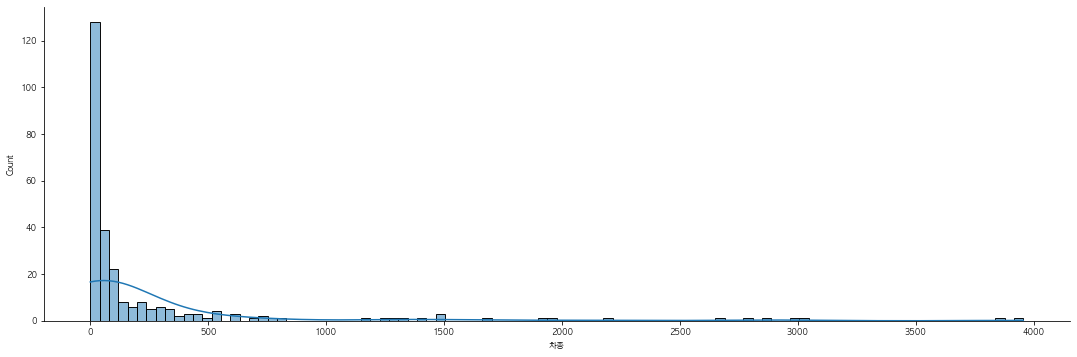

In [6]:
sns.displot(df['차종'].value_counts(),bins=100,height = 5, aspect = 3,kde=True)

In [7]:
df['차종'].value_counts().describe()

count     267.000000
mean      251.370787
std       593.759186
min         1.000000
25%        12.500000
50%        46.000000
75%       185.000000
max      3956.000000
Name: 차종, dtype: float64

# 팔린대수

In [8]:
mean_by_kind=df.groupby('차종').mean()

In [9]:
mean_by_kind=mean_by_kind.astype(int)

In [10]:
mean_by_kind

,기간,연식,주행거리,가격
차종,,,,
124,2,2020,12646,3900
1시리즈,143,2020,5668,3340
200,256,2014,96637,2643
2008,195,2015,84646,2059
207,376,2010,104150,1069
...,...,...,...,...
퓨전,320,2012,105849,788
프라이드,237,2010,103354,738
프리랜더,87,2010,156261,1425


In [17]:
count_by_kind=df.groupby('차종').count()

In [18]:
top20_selling=count_by_kind[['기간']].sort_values(by='기간',ascending=False)[:20]

Text(0.5, 1.0, '차종 별 팔린 대수')

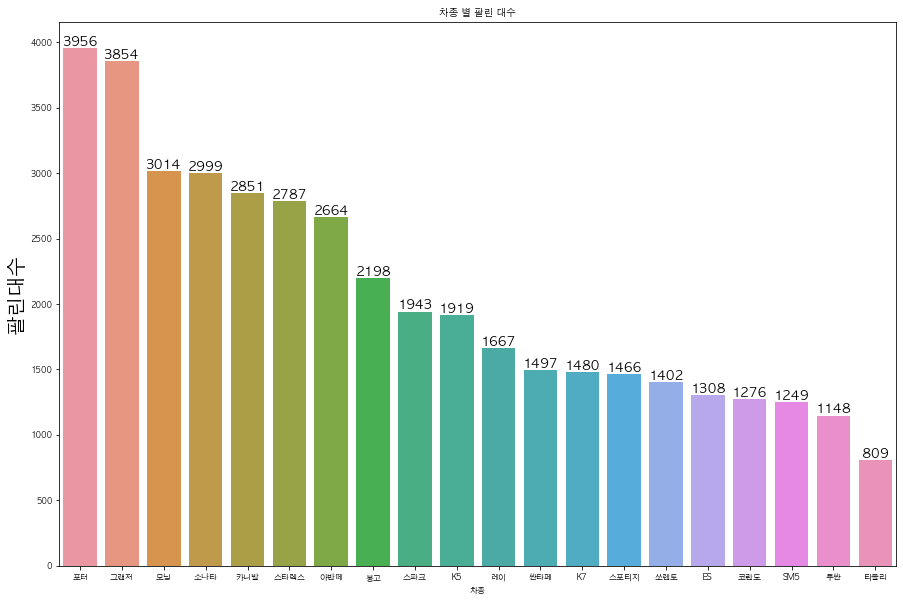

In [19]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=top20_selling.index,y='기간',data=top20_selling)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30),
    ha='center', va='center', fontsize=13, color='black', xytext=(0, 10),
    textcoords='offset points')
ax.set_ylabel("팔린대수", fontsize = 20)
ax.set_title("차종 별 팔린 대수")

# 팔린 평균 기간

In [20]:
df['기간'].describe()

count    67116.000000
mean       205.398638
std        371.708097
min          0.000000
25%         22.000000
50%         53.000000
75%        139.000000
max       5572.000000
Name: 기간, dtype: float64

In [21]:
top20_models=list(top20_selling.index)

In [22]:
time_to_sell=mean_by_kind.loc[top20_models]['기간'].sort_values()

In [23]:
time_to_sell=pd.DataFrame(time_to_sell)

Text(0.5, 1.0, '차종 별 팔린 기간')

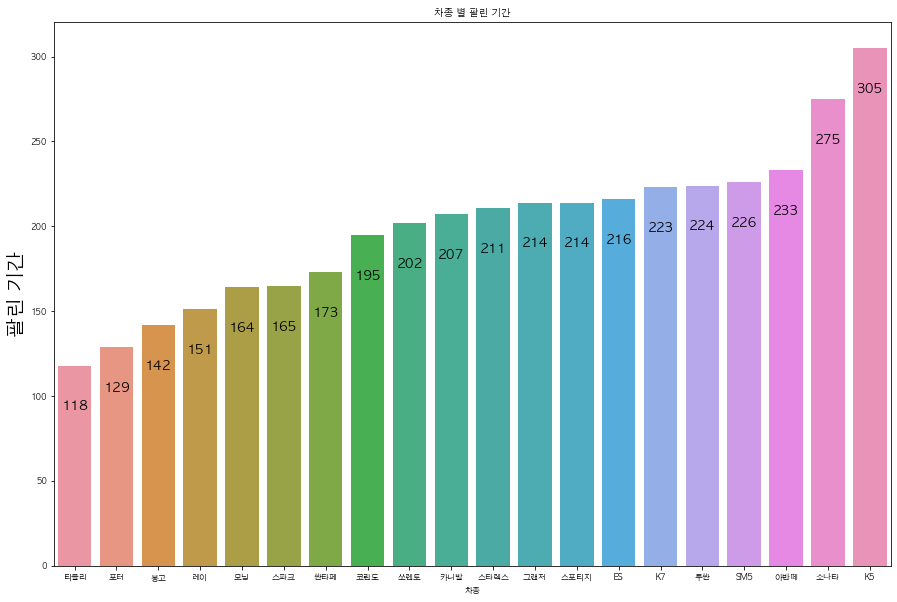

In [24]:
plt.figure(figsize=(15,10))
ax2=sns.barplot(x=time_to_sell.index,y='기간',data=time_to_sell)
for p in ax2.patches:
    ax2.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30),
    ha='center', va='center', fontsize=13, color='black', xytext=(0, 10),
    textcoords='offset points')
ax2.set_ylabel("팔린 기간", fontsize = 20)
ax2.set_title("차종 별 팔린 기간")

# 월별 거래량

In [25]:
df['년월'] = df['판매일'].dt.strftime('%Y%B')

In [26]:
year_month=df.groupby('년월').count()

In [27]:
year_month=year_month.reindex(['2021May','2021June','2021July','2021August',
                    '2021September','2021October','2021November','2021December',
                   '2022January','2022February','2022March','2022April','2022May'],axis='index')

In [28]:
year_month

,판매일,기간,차량/세부모델,미션,연식,연료,주행거리,색상,가격,차종
년월,,,,,,,,,,
2021May,6747,6747,6747,6747,6747,6747,6747,6747,6747,6747
2021June,4921,4921,4921,4921,4921,4921,4921,4921,4921,4921
2021July,6100,6100,6100,6100,6100,6091,6100,6100,6100,6100
2021August,4603,4603,4603,4603,4603,4603,4603,4603,4603,4603
2021September,4807,4807,4807,4807,4807,4807,4807,4807,4807,4807
2021October,4976,4976,4976,4976,4976,4976,4976,4976,4976,4976
2021November,7049,7049,7049,7049,7049,7049,7049,7049,7049,7049
2021December,4411,4411,4411,4411,4411,4411,4411,4411,4411,4411
2022January,6430,6430,6430,6430,6430,6430,6430,6430,6430,6430


<AxesSubplot:xlabel='년월', ylabel='기간'>

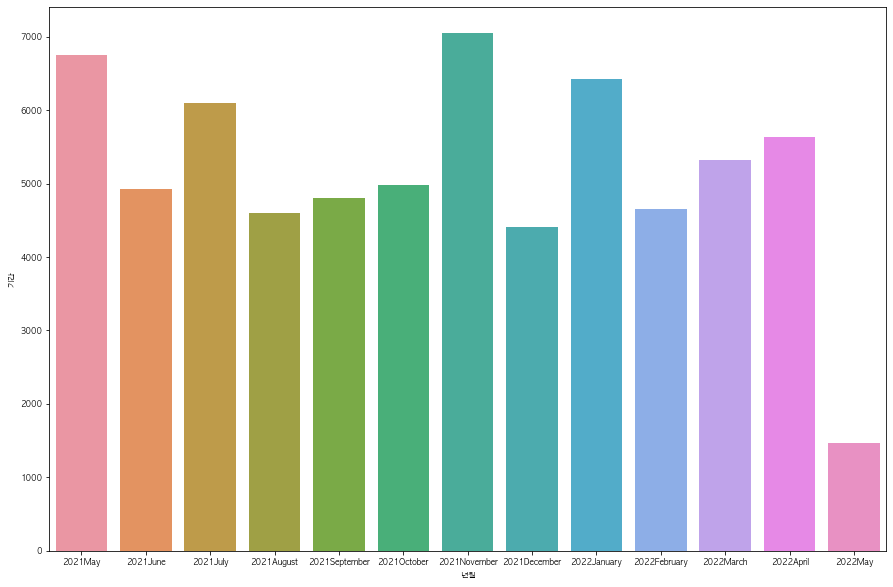

In [29]:
sns.barplot(data=year_month, x=year_month.index, y="기간")

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import pandas_profiling
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

df['판매일_월'] = df['판매일'].dt.month
df['판매일_일'] = df['판매일'].dt.day

report1 = ProfileReport(df)
report1.to_file('usedcar_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 KB 5.6 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.2/975.2 KB 18.2 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 25.2 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.0/174.0 KB 6.9 MB/s eta 0:00:00
  Using cached missingno-0.5.1-py3-none-any.whl (8.7 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 24.9 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached multimethod-1.8-py3-none-any.whl (9.8 kB)
  Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Using cached networkx-2.8-py3-none-any.whl (2.0 MB)
  Using cached ImageHash-4.2.1.tar.gz (812 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 26.1 MB/s eta 0:00:00m eta 0:00:010:00:01
  Created wheel for htmlmin: filename=htmlm

<AxesSubplot:>

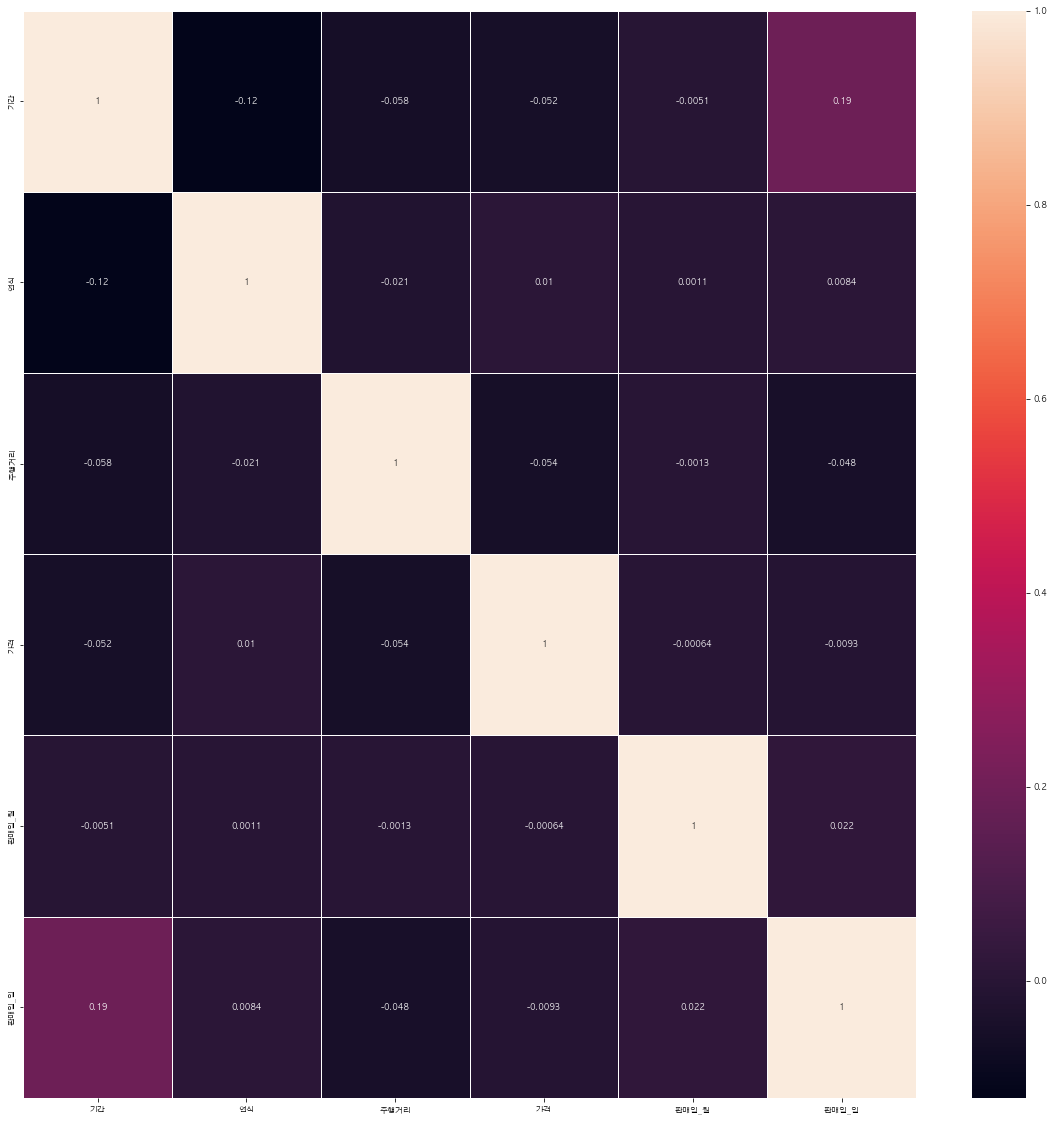

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,)


In [40]:
df.corr()

,기간,연식,주행거리,가격,판매일_월,판매일_일
기간,1.000000,-0.120655,-0.057674,-0.052486,-0.005148,0.193287
연식,-0.120655,1.000000,-0.021039,0.009963,0.001135,0.008419
주행거리,-0.057674,-0.021039,1.000000,-0.054117,-0.001319,-0.047515
가격,-0.052486,0.009963,-0.054117,1.000000,-0.000640,-0.009275
판매일_월,-0.005148,0.001135,-0.001319,-0.000640,1.000000,0.021922
판매일_일,0.193287,0.008419,-0.047515,-0.009275,0.021922,1.000000


In [1]:
len(df)

NameError: name 'df' is not defined